# User Overview Analysis

In [1]:
import os
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

# import sys
# import os
# sys.path.append(os.path.abspath('../scripts'))

In [2]:
from script.user_overview_analyzer import OverviewAnalyser

In [3]:
#acces the data loaded from database
import pickle
with open('variable.pickle','rb') as file:
    xdr_data= pickle.load(file)

### Check missing values

In [4]:
analyzer=OverviewAnalyser()

In [5]:
analyzer.missing_value(xdr_data)

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

### Drop columns that have null value more than half of the whole data

In [6]:
xdr_data= xdr_data.drop(columns=['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','HTTP DL (Bytes)','HTTP UL (Bytes)','Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B',])

### Replace outlier values of numeric colums with mean value using z-scores except  'Bearer Id','IMSI','MSISDN/Number' and'IMEI' columns since they are Id's

In [7]:
analyzer.replace_outliers_with_mean(xdr_data)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,98618.088994,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,98618.088994,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,98618.088994,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,98618.088994,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,98618.088994,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.000000,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.000000,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.000000,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.000000,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


### Replace the missing values with mean or mode based on their data type

In [8]:
xdr_data= analyzer.replace_missing_with_mean_or_mode(xdr_data)

g:\Programming\10_Academy\Week_02\Telecom_Company_Users_Data_Analytics\script\user_overview_analyzer.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col]=data[col].fillna(mode_value) # Replace NaN with mode
g:\Programming\10_Academy\Week_02\Telecom_Company_Users_Data_Analytics\script\user_overview_analyzer.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col]=data[col].fillna(mean_value)  # Replace NaN with mean


### Top 10 handsets used by the customers.

In [9]:
analyzer.rank(xdr_data,'Handset Type',10)

Handset Type
Huawei B528S-23A                19754
Apple iPhone 6S (A1688)          9401
Apple iPhone 6 (A1586)           9004
undefined                        8960
Apple iPhone 7 (A1778)           6301
Apple iPhone Se (A1723)          5176
Apple iPhone 8 (A1905)           4985
Apple iPhone Xr (A2105)          4562
Samsung Galaxy S8 (Sm-G950F)     4504
Apple iPhone X (A1901)           3809
Name: count, dtype: int64

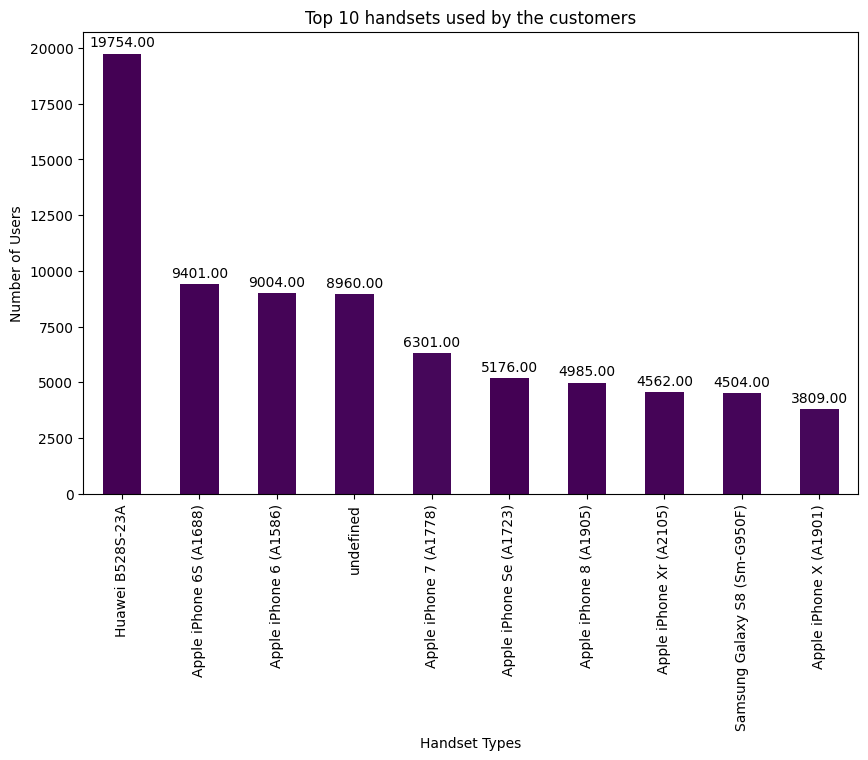

In [10]:
#plot of Top 10 handsets used by the customers
analyzer.rank_bar_plot(xdr_data,'Handset Type','Top 10 handsets used by the customers','Handset Types','Number of Users',10)

### Top 3 handset manufacturers

In [11]:
analyzer.rank(xdr_data,'Handset Manufacturer',3)

Handset Manufacturer
Apple      59442
Samsung    40689
Huawei     34353
Name: count, dtype: int64

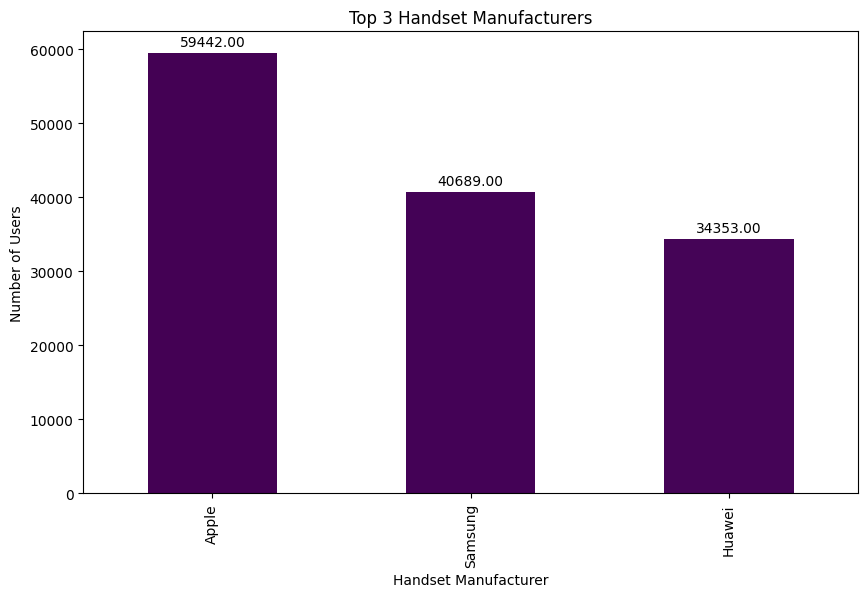

In [12]:
#plot of Top 3 handset manufacturers
analyzer.rank_bar_plot(xdr_data,'Handset Manufacturer','Top 3 Handset Manufacturers','Handset Manufacturer','Number of Users',3)

### Top 5 handsets per top 3 handset manufacturer

In [13]:
analyzer.top_handsets_by_manufacturer(xdr_data)

,Handset Manufacturer,Handset Type,count
60,Apple,Apple iPhone 6S (A1688),9401
56,Apple,Apple iPhone 6 (A1586),9004
66,Apple,Apple iPhone 7 (A1778),6301
80,Apple,Apple iPhone Se (A1723),5176
73,Apple,Apple iPhone 8 (A1905),4985
316,Huawei,Huawei B528S-23A,19752
337,Huawei,Huawei E5180,2079
416,Huawei,Huawei P20 Lite Huawei Nova 3E,2015
415,Huawei,Huawei P20,1476
456,Huawei,Huawei Y6 2018,996


### Aggregiate Per User
**Grouping Users by 'IMSI' since it is unique for each user**

In [14]:
aggregated_xdr_data= analyzer.aggregate_xdr_data(xdr_data)
aggregated_xdr_data

,IMSI,num_sessions,total_duration,total_dl_data,total_ul_data,social_media_dl,social_media_ul,google_dl,google_ul,email_dl,email_ul,youtube_dl,youtube_ul,netflix_dl,netflix_ul,gaming_dl,gaming_ul,other_dl,other_ul
0,2.040471e+14,1,98618.088994,78697597.0,60456049.0,1500145.0,45943.0,5985089.0,3233558.0,2518425.0,812549.0,18980320.0,21960390.0,21621336.0,7224894.0,28092282.0,14977978.0,3.891597e+08,12200737.0
1,2.040808e+14,1,98618.088994,194828056.0,37295915.0,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,164563605.0,13485133.0,4.676781e+08,2848373.0
2,2.082001e+14,1,86019.000000,31376981.0,53794658.0,3073697.0,49084.0,603691.0,1020971.0,3076735.0,580766.0,5556563.0,14325876.0,15305361.0,16525201.0,3760934.0,5363582.0,5.000445e+08,15929178.0
3,2.082001e+14,1,86254.000000,392918313.0,33583272.0,2542767.0,34337.0,10699827.0,3111651.0,3248863.0,606871.0,22414714.0,3242918.0,10065639.0,17720213.0,343946503.0,159394.0,3.009029e+08,8707888.0
4,2.082001e+14,2,281904.088994,961767023.0,71325004.0,3326811.0,99905.0,9118088.0,2547799.0,4225757.0,1338705.0,4046597.0,9793604.0,30748449.0,26594966.0,910301321.0,7383445.0,1.055869e+09,23566580.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106875,2.082099e+14,1,127367.000000,688815403.0,33888182.0,1209387.0,47216.0,8114248.0,3933358.0,845456.0,110856.0,8661662.0,2959812.0,5726631.0,5040884.0,664258019.0,14235971.0,5.808342e+08,7560085.0
106876,2.082099e+14,1,168543.000000,451173021.0,44692550.0,3462783.0,2972.0,661679.0,3626134.0,1531947.0,752619.0,23251957.0,11605503.0,14193266.0,16541988.0,408071389.0,3311290.0,7.437719e+08,8852044.0
106877,2.082099e+14,1,86399.000000,307825104.0,30355487.0,2601607.0,8059.0,1612388.0,2815546.0,1405783.0,311862.0,22196893.0,6993803.0,15051715.0,4554026.0,264956718.0,7089918.0,4.481531e+08,8582273.0
106878,2.082522e+14,1,56613.000000,800629358.0,45083854.0,621586.0,45495.0,1208403.0,1019102.0,3023466.0,31158.0,12776130.0,12133368.0,9816072.0,1098136.0,773183701.0,15385758.0,5.791097e+08,15370837.0


### Variable transformations - segment the user based on total duration of session and compute the total data (DL+UL) per decile class

In [15]:
decile_data=analyzer.segment_and_aggregate(xdr_data)
print(decile_data)

   Decile  Total Data (Bytes)
0       1        5.440572e+12
1       2        6.115747e+12
2       3        6.498708e+12
3       4        6.040168e+12
4       5        5.111388e+12
5       6        6.448051e+12
6       7        6.103798e+12
7       8        7.732419e+12
8       9        9.201106e+12
9      10        1.518377e+13


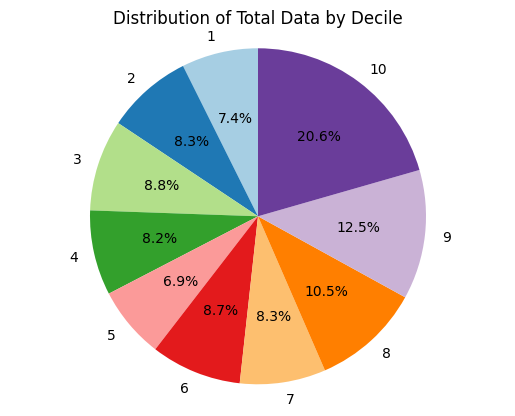

In [16]:
#pie char plot of decile_data
analyzer.decile_pie_chart(decile_data)

### Descriptive statistics
**descriptive ststistics excluding some of the columns**

In [17]:
exclude_columns = ['Bearer Id','Start ms','End ms','IMSI', 'MSISDN/Number', 'IMEI','Handset Type','Handset Manufacturer','Last Location Name']
analyzer.summary_statistics_excluding_columns(xdr_data,exclude_columns)

,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,149001.000000,149001.000000,149001.000000,149001.000000,149001.000000,149001.000000,149001.000000,149001.000000,149001.000000,149001.000000,...,1.490010e+05,1.490010e+05,1.490010e+05,1.490010e+05,1.490010e+05,1.490010e+05,1.490010e+05,1.490010e+05,1.490010e+05,1.490010e+05
mean,98947.278338,78.295178,12.880786,11276.609833,1132.831350,93.725800,2.423987,1.285530,1.024895,98.821626,...,1.163300e+07,1.100953e+07,1.162589e+07,1.100262e+07,4.220878e+08,8.290016e+06,4.211441e+08,8.263124e+06,4.112194e+07,4.546850e+08
std,59971.338171,119.566641,19.181991,18868.539421,2454.163642,10.989786,4.412761,2.679857,2.567310,2.647444,...,6.711083e+06,6.345413e+06,6.724902e+06,6.358550e+06,2.439964e+08,4.781857e+06,2.431721e+08,4.768241e+06,1.125721e+07,2.441694e+08
min,7142.000000,0.000000,0.000000,0.000000,0.000000,49.000000,0.000000,0.000000,0.000000,73.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,7.324119e+06,7.114041e+06
25%,58008.000000,35.000000,3.000000,43.000000,47.000000,92.000000,0.000000,0.000000,0.000000,99.000000,...,5.833238e+06,5.518033e+06,5.777563e+06,5.477282e+06,2.105502e+08,4.131128e+06,2.103225e+08,4.145042e+06,3.322792e+07,2.431668e+08
50%,86399.000000,54.000000,7.000000,63.000000,62.000000,100.000000,0.000000,0.000000,0.000000,100.000000,...,1.161312e+07,1.101199e+07,1.163969e+07,1.099946e+07,4.234924e+08,8.291948e+06,4.218085e+08,8.266894e+06,4.113715e+07,4.559921e+08
75%,128290.000000,78.295178,12.880786,16919.000000,1119.000000,100.000000,3.000000,1.000000,1.000000,100.000000,...,1.744747e+07,1.651526e+07,1.746873e+07,1.650531e+07,6.332598e+08,1.243249e+07,6.316717e+08,1.237937e+07,4.902714e+07,6.657569e+08
max,347699.000000,1769.000000,244.000000,85214.000000,15639.000000,100.000000,21.000000,14.000000,16.000000,100.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.483343e+07,9.029696e+08


### Bivariant Analysis

Correlation Matrix:
total_data            1.000000
social_media_total    0.624402
google_total          0.682045
email_total           0.664183
youtube_total         0.705385
netflix_total         0.705343
gaming_total          0.997003
other_total           0.619467
Name: total_data, dtype: float64


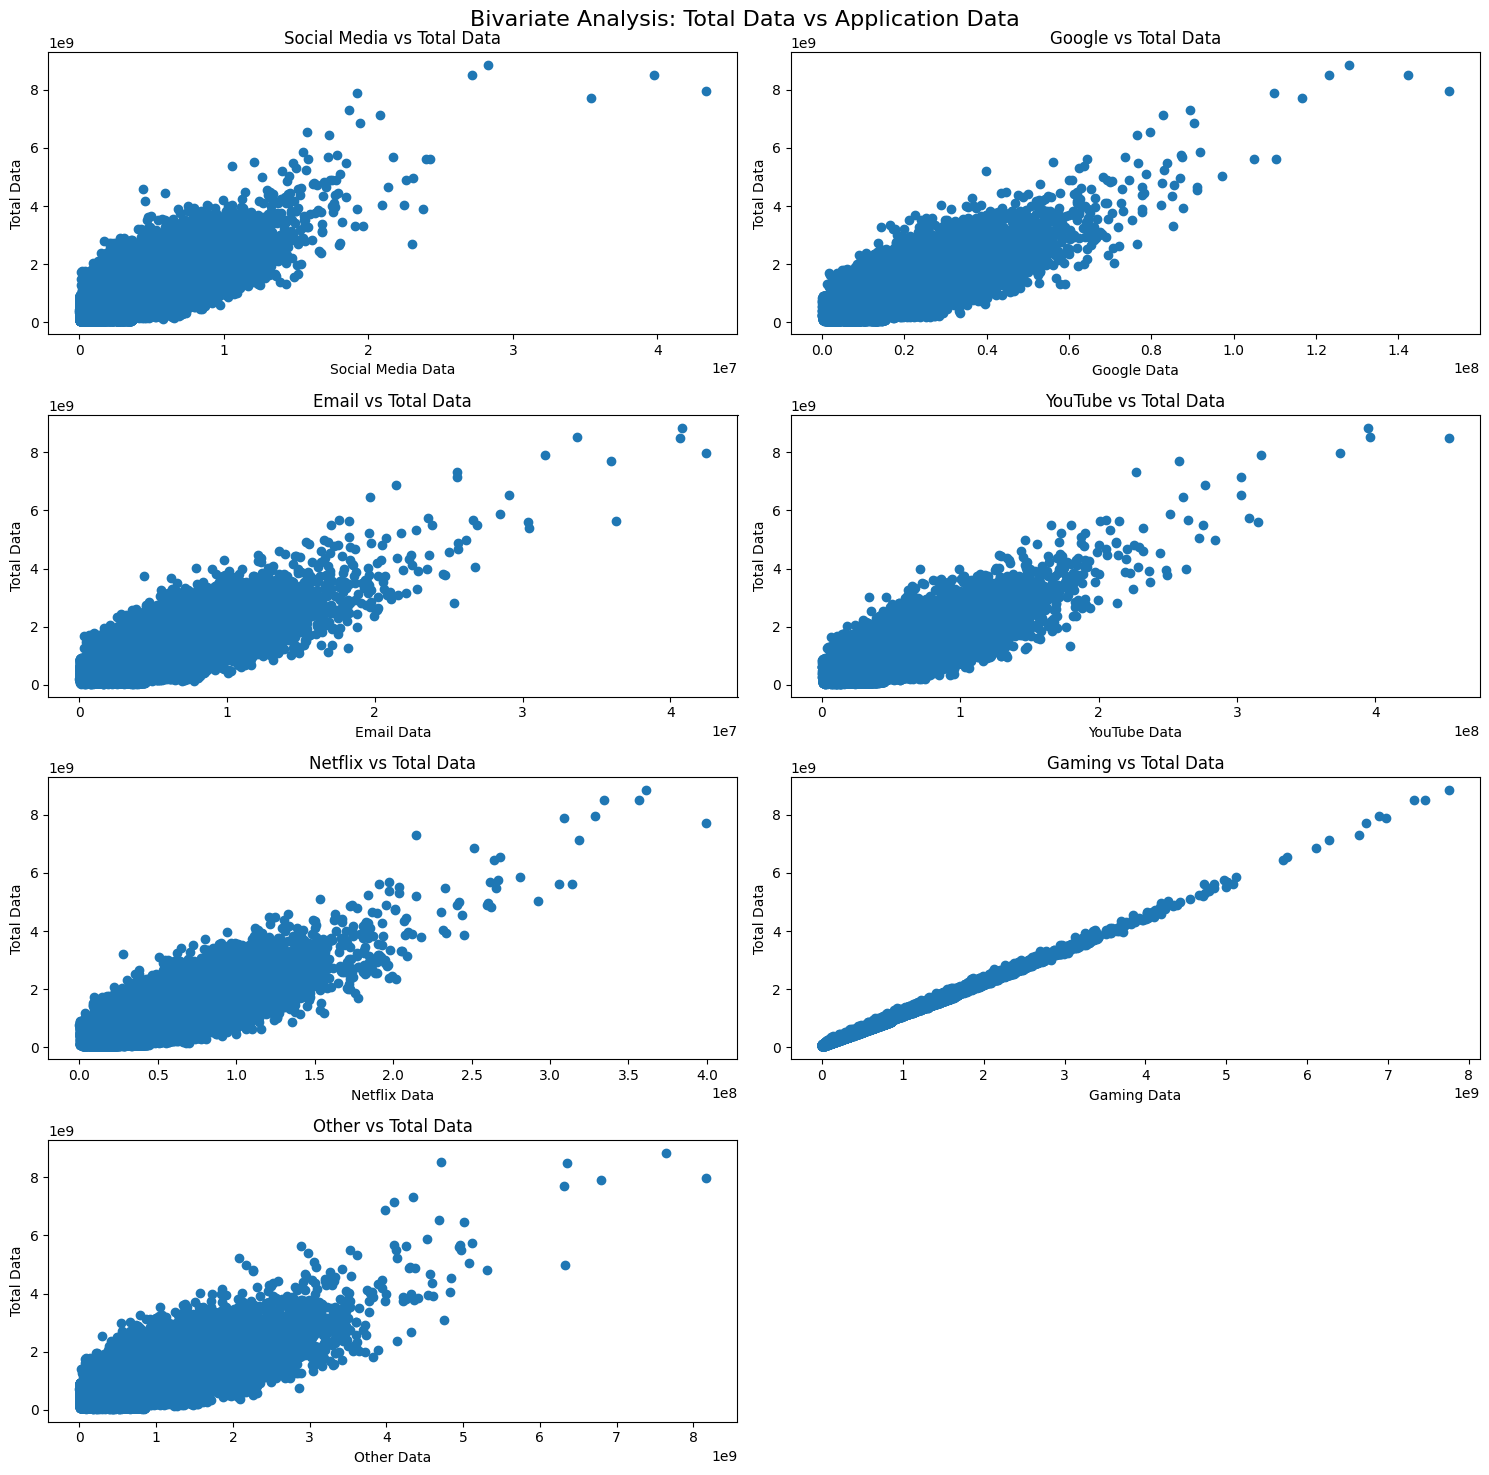

In [18]:
analyzer.bivariate_analysis(aggregated_xdr_data)

### Correlation Analysis

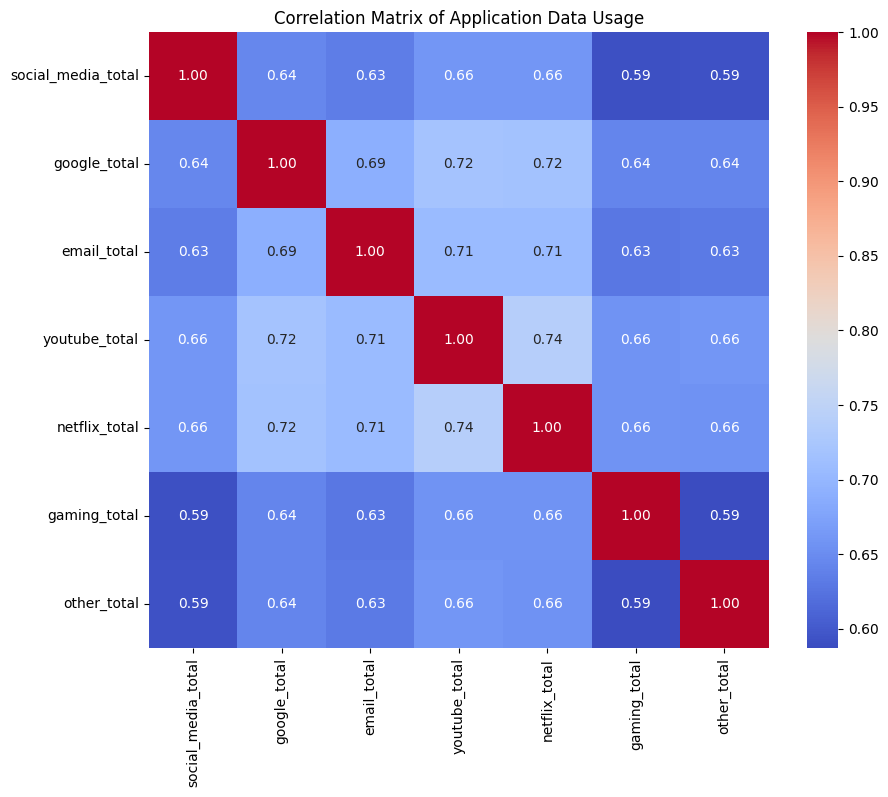

,social_media_total,google_total,email_total,youtube_total,netflix_total,gaming_total,other_total
social_media_total,1.000000,0.643490,0.634549,0.659847,0.660293,0.590512,0.592175
google_total,0.643490,1.000000,0.688778,0.718875,0.716547,0.642355,0.643132
email_total,0.634549,0.688778,1.000000,0.705064,0.705896,0.627897,0.631476
youtube_total,0.659847,0.718875,0.705064,1.000000,0.738685,0.657776,0.660680
netflix_total,0.660293,0.716547,0.705896,0.738685,1.000000,0.657740,0.656175
gaming_total,0.590512,0.642355,0.627897,0.657776,0.657740,1.000000,0.586843
other_total,0.592175,0.643132,0.631476,0.660680,0.656175,0.586843,1.000000


In [19]:
analyzer.correlation_matrix(aggregated_xdr_data)

### Dimensionality Reduction

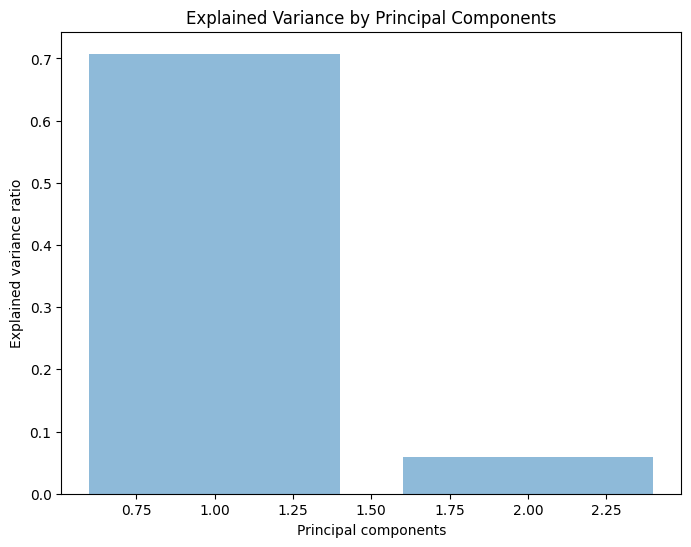

In [20]:
pca_df, explained_variance = analyzer.perform_pca(aggregated_xdr_data)